# Лабораторная работа №3

#### Выполнили Светлакова Ульяна и Сурикова Дарья 4-ПМИ 2 подгр.

[Теория](https://docs.google.com/document/d/19C2aW-Nczk4MC4C5F9xL9ndPqcJmSdc2ADPHRiMKvCg/edit?usp=sharing)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson

In [3]:
def n(y):
    return np.exp(-y)

Выбран показатель преломления $n(y) = e^{-y}$
функция уменьшается при увеличении $y$, что соответствует физическим условиям задачи.

In [4]:
def X(p, y_values):
    integrand = lambda y: 1 / np.sqrt(n(y)**2 - p**2) if n(y)**2 > p**2 else 0
    integral = simpson([integrand(y) for y in y_values], y_values)
    return 2 * p * integral

Используется формула:
$$X(p) = 2p \int_0^{n^{-1}(p)} \frac{dy}{\sqrt{n^2(y) - p^2}}$$

`integrand(y)` — вычисляет подынтегральную функцию <br>
`simpson([...], y_values)` — вычисляет интеграл методом Симпсона

In [5]:
def inverse_n(r, p_values, X_values):
    integrand = lambda p: X_values[np.where(p_values == p)[0][0]] / np.sqrt(p**2 - r**2) if p > r else 0
    integral = simpson([integrand(p) for p in p_values], p_values)
    return (1 / np.pi) * integral


Используется обратная формула:
$$n^{-1}(r) = \frac{1}{\pi} \int_r^{n(0)} \frac{X(p) dp}{\sqrt{p^2 - r^2}}$$
`integrand(p)` — вычисляет подынтегральное выражение <br>
`simpson([...], p_values)` — численно интегрирует по $p$

In [6]:
y_values = np.linspace(0, 2, 100)
p_values = np.linspace(0.1, 1, 50)
X_values = np.array([X(p, y_values) for p in p_values])
n_reconstructed = np.array([inverse_n(r, p_values, X_values) for r in np.linspace(0.1, 1, 50)])

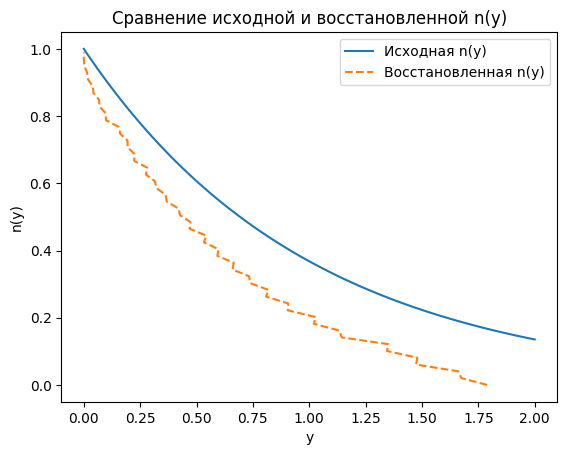

In [7]:
plt.plot(y_values, n(y_values), label='Исходная n(y)')
plt.plot(n_reconstructed, y_values[:50], label='Восстановленная n(y)', linestyle='dashed')
plt.legend()
plt.xlabel('y')
plt.ylabel('n(y)')
plt.title('Сравнение исходной и восстановленной n(y)')
plt.show()